In [ ]:
import os
import cv2
import pickle
import numpy as np
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, Flatten, Dense, AveragePooling2D, Dropout
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/asl dataset/asl_dataset'

In [ ]:
data,label = [],[]
for root, dirs, files in os.walk(path):
    key = os.path.basename(root)
    for file in files:
        full_file_path = os.path.join(root,file)
        img = cv2.imread(full_file_path)
        img = cv2.resize(img,(128,128))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        data.append(img)
        label.append(key)

data = np.array(data)
label = np.array(label)

In [ ]:
x_train, x_test0, y_train, y_test0 = train_test_split(data, label, test_size=0.2)
x_test, x_val, y_test, y_val = train_test_split(x_test0, y_test0, test_size=0.5)

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(2015, 128, 128, 3)
(2015,)
(252, 128, 128, 3)
(252,)
(252, 128, 128, 3)
(252,)


In [ ]:
# Normalization
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [ ]:
#Encode labels from string to int
le = preprocessing.LabelEncoder()
labelEnc_train = le.fit_transform(y_train)
labelEnc_test = le.fit_transform(y_test)
labelEnc_val = le.fit_transform(y_val)

In [ ]:
print(x_val.shape)
print(labelEnc_val.shape)

(252, 128, 128, 3)
(252,)


In [ ]:
num_classes = 36

model = keras.Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (128,128,3)))
model.add(AveragePooling2D(pool_size=(2, 2))) # Added pool_size

model.add(Conv2D(64, (5,5), activation = 'relu'))
model.add(AveragePooling2D(pool_size=(2, 2))) # Added pool_size

model.add(Flatten())

# ... rest of your model definition

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 124, 124, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 62, 62, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 58, 58, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 29, 29, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 53824)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,889,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,947,940 (26.50 MB)

 Trainable params: 6,947,940 (26.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(x_train, labelEnc_train, validation_data=(x_val,labelEnc_val), epochs=6, batch_size=32)

Epoch 1/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - acc: 0.2820 - loss: 2.7841 - val_acc: 0.8413 - val_loss: 0.5612
Epoch 2/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - acc: 0.8154 - loss: 0.6241 - val_acc: 0.9246 - val_loss: 0.3348
Epoch 3/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - acc: 0.8950 - loss: 0.3441 - val_acc: 0.9325 - val_loss: 0.2750
Epoch 4/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - acc: 0.9261 - loss: 0.2258 - val_acc: 0.9365 - val_loss: 0.3042
Epoch 5/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - acc: 0.9301 - loss: 0.1826 - val_acc: 0.9563 - val_loss: 0.2692
Epoch 6/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - acc: 0.9482 - loss: 0.1592 - val_acc: 0.9444 - val_loss: 0.2550


In [ ]:
loss, accuracy = model.evaluate(x_test, labelEnc_test)
print('Test Accuracy =', accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 357ms/step - acc: 0.9516 - loss: 0.1371
Test Accuracy = 0.932539701461792


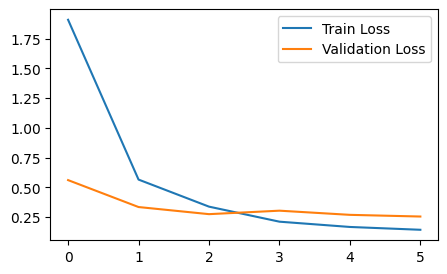

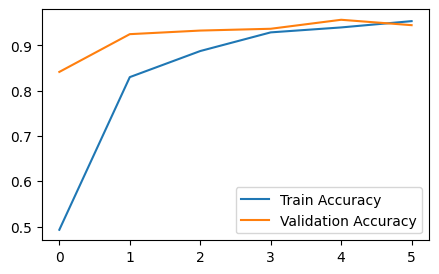

In [ ]:
# Plot the loss value
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.figure(figsize=(5,3))
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Classification Report
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)

print(classification_report(y_pred, labelEnc_test))

7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 795ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 732ms/step
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.80      0.80      0.80         5
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         2
           6       0.40      0.50      0.44         4
           7       0.90      1.00      0.95         9
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       0.88      1.00      0.93         7
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.0

Text(0.5, 1.0, 'Confusion Matrix')

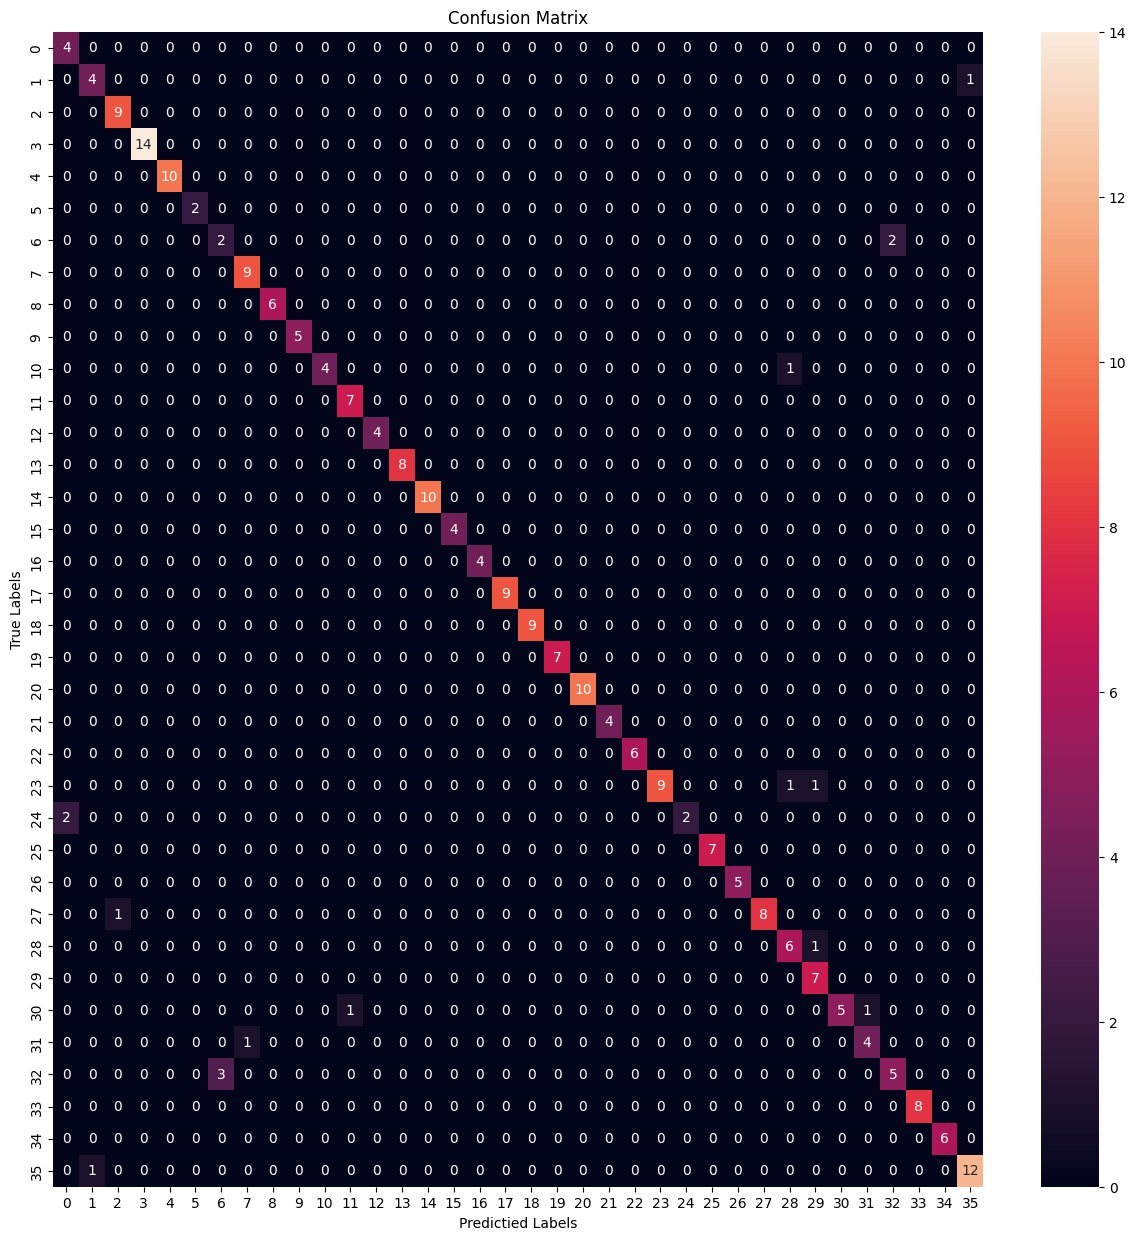

In [ ]:
# Confusion Matrix
cmatrix = confusion_matrix(y_pred, labelEnc_test)
fig, ax = plt.subplots(figsize=(15, 15))
sn.heatmap(cmatrix,annot=True,fmt='g',ax=ax)
ax.set_xlabel('Predictied Labels');ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix')

In [ ]:
model.save("model.h5")

In [ ]:
mod = tf.keras.models.load_model('model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
The Prediction For This Image = 25
The Actual Prediction For This Image = 25


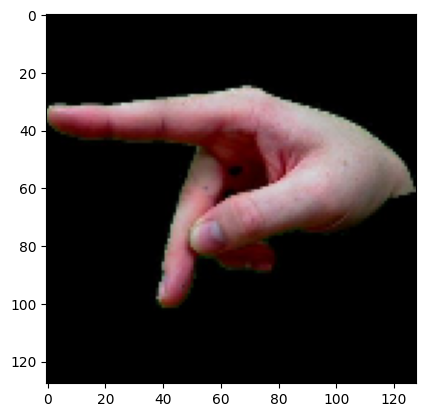

In [ ]:
idx = np.random.randint(0,x_test.shape[0])
pic = x_test[idx]
Ipic = np.expand_dims(pic,axis=0)
IFpic = mod.predict(Ipic)
predictions = np.argmax(IFpic)
print("The Prediction For This Image =",predictions)
print("The Actual Prediction For This Image =",labelEnc_test[idx])
fig,ax = plt.subplots()
ax.imshow(pic)
plt.imshow(pic)

In [ ]:
labels = np.unique(y_train)
labels

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c',
       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], dtype='<U1')

In [ ]:
def predict_input_image(img):
    image = img.reshape(-1,128,128,3)
    prediction = mod.predict(image)[0]
    confidences = {labels[i]: float(prediction[i]) for i in range(36)}
    return confidences

def display_and_predict(img_path):
    # Load and display the image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not read image from {img_path}. Please check the file path.")
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB for display
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

    # Resize image for prediction
    img = cv2.resize(img, (128, 128))

    # Predict the sign
    confidences = predict_input_image(img)
    predicted_class = max(confidences, key=confidences.get)
    print("Predicted Sign:", predicted_class)

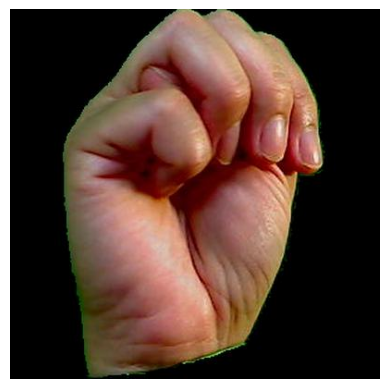

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted Sign: m


In [ ]:
display_and_predict('/content/drive/MyDrive/samplepic.jpeg')

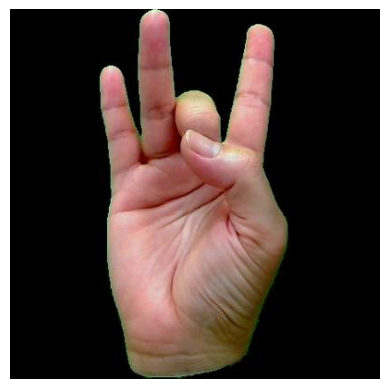

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Sign: 8


In [ ]:
display_and_predict('/content/drive/MyDrive/8.jpg')